In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.append("../research2017/ELVIS_HALO_Catalogs/IsolatedCatalogs")
sys.path.append("../research2017/ELVIS_Main_Branches/IsolatedTrees")

In [2]:
def massAnalogs(filename):
    #Create list of analogs of a single system; DOES NOT PLOT; returns list of indices where analogs occur
    data=np.genfromtxt(filename,usecols=(0,9),names=True); #cols for ID and Virial Mass
    #Select halos with mass <10^7 Msun; mass of Ret II = 5.6*10^5 (Simon et al, 2015, Stellar Kinematic & Met)
    selectionMass=(data['MvirMsun']<10**7);
    index=np.where(selectionMass)
    return data[selectionMass]

In [3]:
def indexMassLogs(filename):
    #Create list of analogs of a single system; DOES NOT PLOT; returns list of indices where analogs occur
    data=np.genfromtxt(filename,usecols=(0,9),names=True); #cols for ID and Virial Mass
    #Select halos with mass <10^7 Msun; mass of Ret II = 5.6*10^5 (Simon et al, 2015, Stellar Kinematic & Met)
    selectionMass=(data['MvirMsun']<10**7);
    index=np.where(selectionMass)
    return index

In [4]:
def distTrack(dataX,dataY,dataZ,dataScale,n,system):
    #This function creates an array of the position vs. time of a specific distance-analog (n) in a given system.
    #Notice you have to load position data first
    dist0X=dataX[0]#array of the central halo X position at different scale factor
    dist0Y=dataY[0]#array of the central halo X position at different scale factor
    dist0Z=dataZ[0]#array of the central halo X position at different scale factor
    xDistArray=np.multiply((dist0X-dataX[n]),(dist0X-dataX[n])); #x^2=(x1-x2)^2
    yDistArray=np.multiply((dist0Y-dataY[n]),(dist0Y-dataY[n])); #y^2=(y1-y2)^2
    zDistArray=np.multiply((dist0Z-dataZ[n]),(dist0Z-dataZ[n])); #z^2=(z1-z2)^2
    distArray=np.sqrt(xDistArray+yDistArray+zDistArray) #Distance formula dist=sqrt(x^2+y^2+z^2)
    a=np.vstack((dataScale[n],distArray))
    return a

def plotTrack(system):
    #Creates plot of position vs. time for all mass-analogs in a system.
    indexList=indexMassLogs('../ELVIS_HALO_Catalogs/IsolatedCatalogs/'+system+'.txt'); #get rows where distance-analogs occur
    dataX=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+system+"/X.txt");#get data of X position
    dataY=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+system+"/Y.txt");#get data of Y position
    dataZ=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+system+"/Z.txt");#get data of Z position
    dataScale=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+system+"/scale.txt"); #get data of scale factor
    fig1=plt.figure();
    axes=plt.gca()
    for i in indexList[0][:]:
        array=distTrack(dataX,dataY,dataZ,dataScale,i,system)
        axes.plot(array[0],array[1],'.')
    axes.set_title("Distance tracking for"+" "+system+" "+"distance-analogs");
    axes.set_xlabel("Scale Factor");
    axes.set_ylabel("Distance (Mpc)");   
    axes.set_ylim([0,8]); 
    plt.show()

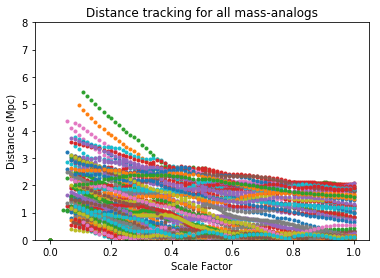

In [18]:
systems=("iBurr","iCharybdis","iCher","iDouglas","iHall","iHamilton","iHera","iKauket","iKek","iLincoln","iLouise","iOates","iOrion","iRemus","iRomulus","iRoy","iScylla","iSerana","iSiegfried","iSonny","iTaurus","iThelma","iVenus","iZeus");
axes=plt.gca();
final=np.empty([2,1])
for i in systems:
    indexList=indexMassLogs('../ELVIS_HALO_Catalogs/IsolatedCatalogs/'+i+'.txt'); #get rows where mass-analogs occur
    dataX=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+i+"/X.txt");#get data of X position
    dataY=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+i+"/Y.txt");#get data of Y position
    dataZ=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+i+"/Z.txt");#get data of Z position
    dataScale=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+i+"/scale.txt"); #get data of scale factor
    for k in indexList[0][:]: #create array of distances for each analog in indexList
        arr=distTrack(dataX,dataY,dataZ,dataScale,k,i);
        axes.plot(arr[0],arr[1],'.')
axes.set_title("Distance tracking for all mass-analogs");
axes.set_xlabel("Scale Factor");
axes.set_ylabel("Distance (Mpc)");   
axes.set_ylim([0,8]); 
plt.show()

In [58]:
#Create array of all mass-analogs

#Initializing array with iBurr system
indexList0=indexMassLogs('../ELVIS_HALO_Catalogs/IsolatedCatalogs/iBurr.txt'); #get rows where mass-analogs occur for iBurr system 
dataX0=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/iBurr/X.txt");#get data of X position for iBurr
dataY0=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/iBurr/Y.txt");#get data of Y position for iBurr
dataZ0=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/iBurr/Z.txt");#get data of Z position for iBurr
dataScale0=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/iBurr/scale.txt"); #get data of scale factor for iBurr
final=distTrack(dataX0,dataY0,dataZ0,dataScale0,193,"iBurr"); #initializing array
for n in indexList0[0][1:]:
    final=np.hstack((final,distTrack(dataX0,dataY0,dataZ0,dataScale0,n,"iBurr")));

In [59]:
#Adding all the other mass-analogs from all the other systems (except iBurr)   
systems=("iCharybdis","iCher","iDouglas","iHall","iHamilton","iHera","iKauket","iKek","iLincoln","iLouise","iOates","iOrion","iRemus","iRomulus","iRoy","iScylla","iSerana","iSiegfried","iSonny","iTaurus","iThelma","iVenus","iZeus");
for i in systems:
    indexList=indexMassLogs('../ELVIS_HALO_Catalogs/IsolatedCatalogs/'+i+'.txt'); #get rows where mass-analogs occur
    dataX=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+i+"/X.txt");#get data of X position
    dataY=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+i+"/Y.txt");#get data of Y position
    dataZ=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+i+"/Z.txt");#get data of Z position
    dataScale=np.genfromtxt("../ELVIS_Main_Branches/IsolatedTrees/"+i+"/scale.txt"); #get data of scale factor
    for k in indexList[0][:]:
        final=np.hstack((final,distTrack(dataX,dataY,dataZ,dataScale,k,i))); #Array with all mass-analogs. final[0] is list of scale factors and final[1] is distance

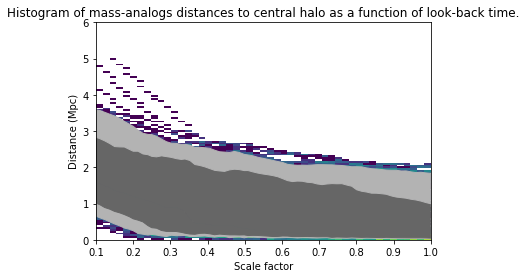

In [34]:
#Calculate percentiles and plot percentile lines along with all distance analogs
from matplotlib.colors import LogNorm
ax2=plt.gca()
ar=[5,18,50,84,95]; #percentiles
scFactor=final[0,:75] #Scale factor array = first 75 entries of final[0] (final[0] repeats over and over again)
for i in scFactor: 
    selectionI=(final[0]==i); #select entries of final[0] that are equal to a given scale factor
    indexList=np.where(selectionI) #list of entries where final[0] is equal to a given scale factor
    arraySelection=np.take(final,indexList,axis=1) #take only those entries (arraySelection[0]=given scale factor; arraySelection[1]=distances)
    percentile=np.percentile(arraySelection[1],(5,18,50,84,95)) #calculate the percentile distances at a given scale factor
    ar=np.vstack((ar,percentile)) #array of all the percentile distances (stacking) 
ax2=plt.gca()
p1=[scFactor,ar[:,0][1:]]; #make array of percentile=5% vs scale factor
p1c=np.ascontiguousarray(p1, dtype=np.float32); #make p1 continuous
p2=[scFactor,ar[:,1][1:]]; #make array of percentile=18% vs scale factor
p2c=np.ascontiguousarray(p2, dtype=np.float32); #make p2 continuous
p3=[scFactor,ar[:,2][1:]]; #make array of percentile=50% vs scale factor
p3c=np.ascontiguousarray(p3, dtype=np.float32); #make p3 continuous
p4=[scFactor,ar[:,3][1:]]; #make array of percentile=84% vs scale factor
p4c=np.ascontiguousarray(p4, dtype=np.float32); #make p4 continuous
p5=[scFactor,ar[:,4][1:]]; #make array of percentile=95% vs scale factor
p5c=np.ascontiguousarray(p5, dtype=np.float32); #make p5 continuous
#ax2.plot(final[0],final[1],'.',alpha=0.1,zorder=0) #plot all distance-analogs (all with same color)
ax2.hist2d(final[0],final[1],bins=(np.linspace(0.1,1.,50),np.linspace(0,5,100)),norm=LogNorm())
ax2.fill_between(p1c[0],p1c[1],p2c[1],color='0.7') #plot 5% and 18% area in-between#
ax2.fill_between(p1c[0],p2c[1],p3c[1],color='0.4') #plot 18% and 50% area in-betwen
ax2.fill_between(p1c[0],p3c[1],p4c[1],color='0.4') #plot 50% and 84% area in-between
ax2.fill_between(p1c[0],p4c[1],p5c[1],color='0.7') #plot 84% and 95% area in-between
ax2.set_title("Histogram of mass-analogs distances to central halo as a function of look-back time.")
ax2.set_xlabel("Scale factor")
ax2.set_ylabel("Distance (Mpc)")
ax2.set_xlim([0.1,1])
ax2.set_ylim([0,6])
plt.show()

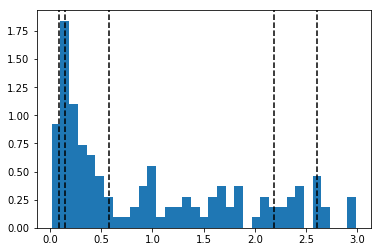

In [23]:
selectionI=(final[0]==0.3526); #select entries of final[0] that are equal to a given scale factor
indexList=np.where(selectionI) #list of entries where final[0] is equal to a given scale factor
arraySelection=np.take(final,indexList,axis=1) #take only th
percentile=np.percentile(arraySelection[1],(5,16,50,84,95))
ax5=plt.gca();
ax5.hist(arraySelection[1].flatten(),bins=35,normed=1)
for p in percentile:
    plt.axvline(p,ls='--',color='k')
plt.show()

In [26]:
medianDist=percentile[2]
medianDist

0.57496982118569484

In [45]:
#Create complete list of analogs across all isolated systems.
files=("iCharybdis","iCher","iDouglas","iHall","iHamilton","iHera","iKauket","iKek","iLincoln","iLouise","iOates","iOrion","iRemus","iRomulus","iRoy","iScylla","iSerana","iSiegfried","iSonny","iTaurus","iThelma","iVenus","iZeus");
analogsArray=massAnalogs("../ELVIS_HALO_Catalogs/IsolatedCatalogs/iBurr.txt")
for i in files:
    fullName='../ELVIS_HALO_Catalogs/IsolatedCatalogs/'+i+'.txt'
    analogsArray=np.append(analogsArray,massAnalogs(fullName),axis=0);

In [46]:
analogsArray.shape

(183,)